In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

            max_1
date             
2016-08-24   2.28
2016-08-25   0.21
2016-08-26   0.04
2016-08-27   0.18
2016-08-28   2.07
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


<IPython.core.display.Javascript object>


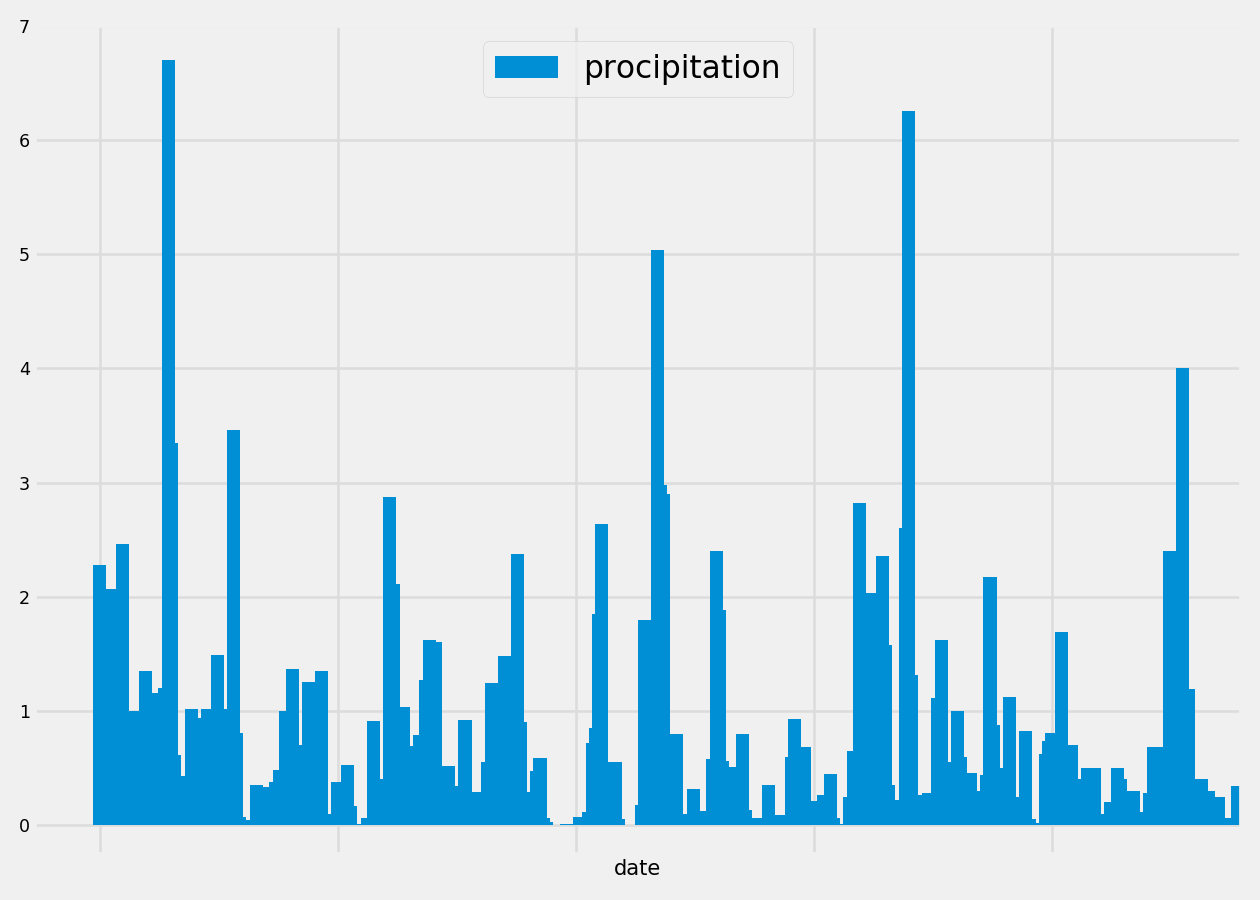

365
Bbox(x0=0.08, y0=0.06999999999999995, x1=0.95, y1=0.88)
[0.13, 0.11999999999999995, 0.58, 0.54]


In [12]:
%matplotlib notebook

# Design a query to retrieve the last 12 months of precipitation data and plot the results
import datetime as dt
from datetime import datetime


# Calculate the date 1 year ago from the last data point in the database

last_date1 = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(5).all()
#print(last_date1)

last_date2 = [date[0] for date in last_date1]
#print(last_date2)

last_date3 = last_date2[0]
#print(last_date3)

last_date = dt.datetime.strptime(last_date3, '%Y-%m-%d')
#print(last_date)
#print(last_date.month)
#last_date = dt.date(last_date3).strptime('%Y-%m-%d')
#print(last_date)

query_dateline = dt.date(last_date.year, last_date.month, last_date.day) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, func.max(Measurement.prcp)).filter(Measurement.date > query_dateline).\
          filter(Measurement.prcp != None).group_by(Measurement.date).statement

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp = pd.read_sql_query(results, session.bind)

#print(df_prcp.head(10))
#print(type(df_prcp))

#df_prcp = df_prcp.rename(columns={'max_1':'precipitation'})

df_prcp_index = df_prcp.set_index(['date'])

#print(df_prcp_index.head(10))

# Sort the dataframe by date
df_prcp_sort = df_prcp_index.sort_values(by=['date'],ascending=True)

#del df_prcp_sort.index.name

print(df_prcp_sort.head())

#dates = [result[0] for result in results]
#precipitation = [result[1] for result in results]
#print(precipitation)



# Use Pandas Plotting with Matplotlib to plot the data
print(plt.style.available)
#plt.style.reload_library()
#print(plt.style.available)
#plt.style.use('fivethirtyeight')
#print(plt.style.available)

#plt.grid(which='major', alpha=1)

fig, ax = plt.subplots(figsize=(14,10))

#plt.locator_params(axis='x', nbins=5)

print(len(df_prcp_sort))

pos1 = ax.get_position() # get the original position 
print(pos1)
pos2 = [pos1.x0+0.05, pos1.y0+0.05, pos1.width / 1.5, pos1.height / 1.5] 
print(pos2)
#ax.set_position(pos2) # set a new position

#pos3 = ax.get_position()
#print(pos3)

df_prcp_sort.iloc[0:-1].plot(ax = ax, kind='bar', width=4, align='center', stacked=True)

#xpos = range(1, 5)
#ax.set_xticks(xpos)
#plt.xlim(-1.75, 4.75)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)


# Don't allow the axis to be on top of data
ax.set_axisbelow(True)
#print(ax.get_xticks())
#ticks = range(0,5)
#ax.set_xticks(ticks, minor=False)
#print(ax.get_xticks())
plt.xlim(-20, len(df_prcp_sort)-15)
plt.ylim(-0.25, 7)
plt.locator_params(axis='x', nbins=5)
# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='1', color='grey')
# Customize the grid
ax.grid(linestyle='-', linewidth='2', color='gainsboro')

ax.get_figure().tight_layout()
ax.get_figure().subplots_adjust()

#fig.tight_layout()

#plt.legend(prop={'size':15})
#plt.legend(numpoints=1, handlelength=4, markerscale=0.1, borderpad=0.5, framealpha=2, labelspacing=0.1, loc='upper center', fontsize=25)

#lgd = plt.legend(loc='upper center')
#orig_handle = lgd.legendHandles
#h = legend('one plot', 'another plot', 'location', 'NorthWest'); #example legend
#ch = findobj(get(h,'children'), 'type', 'text');  #children of legend of type text
#set(ch, 'Fontsize', 25);   #set value as desired
#ch = findobj(get(h,'children'), 'type', 'line');  #children of legend of type line
#set(ch, 'Markersize', 12);  #set value as desired
#for handle in lgd.legendHandles:
#    handle.set_markersize(12)
#    handle.set_fontsize(25)

#from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
#p = mpatches.Rectangle(xy='upper center', width='2', height='0.1', angle=0.0)
#HandlerPatch.update_prop(p, orig_handle, lgd)
#p.set_transform(trans)
bar = mpatches.Patch(label='procipitation', linewidth=None, linestyle='-')
plt.legend(handles=[bar], loc='upper center', fontsize=25)


#for handle in lgd.legendHandles:
 #   handle.set_sizes([30.0])

#plt.tight_layout(pad=0)
plt.show()
plt.savefig("Images/prcp.png")

<IPython.core.display.Javascript object>


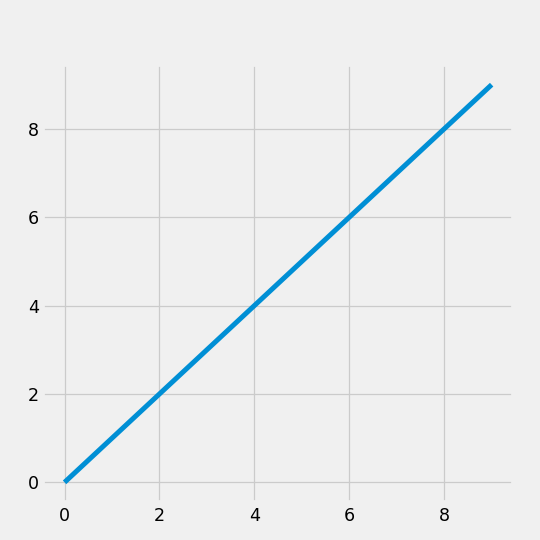

-0.45 9.45 -0.45 9.45


In [23]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(range(10),range(10))
#ax.set_aspect('equal')


plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
print(x0,x1,y0,y1)
#plt.axis((x0 - plot_margin,
 #         x1 + plot_margin,
  #        y0 - plot_margin,
   #       y1 + plot_margin))

# Exploratory Climate Analysis

![precipitation](Images/precipitation.png)

            max_1
date             
2016-08-24   2.28
2016-08-25   0.21
2016-08-26   0.04
2016-08-27   0.18
2016-08-28   2.07
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


<IPython.core.display.Javascript object>


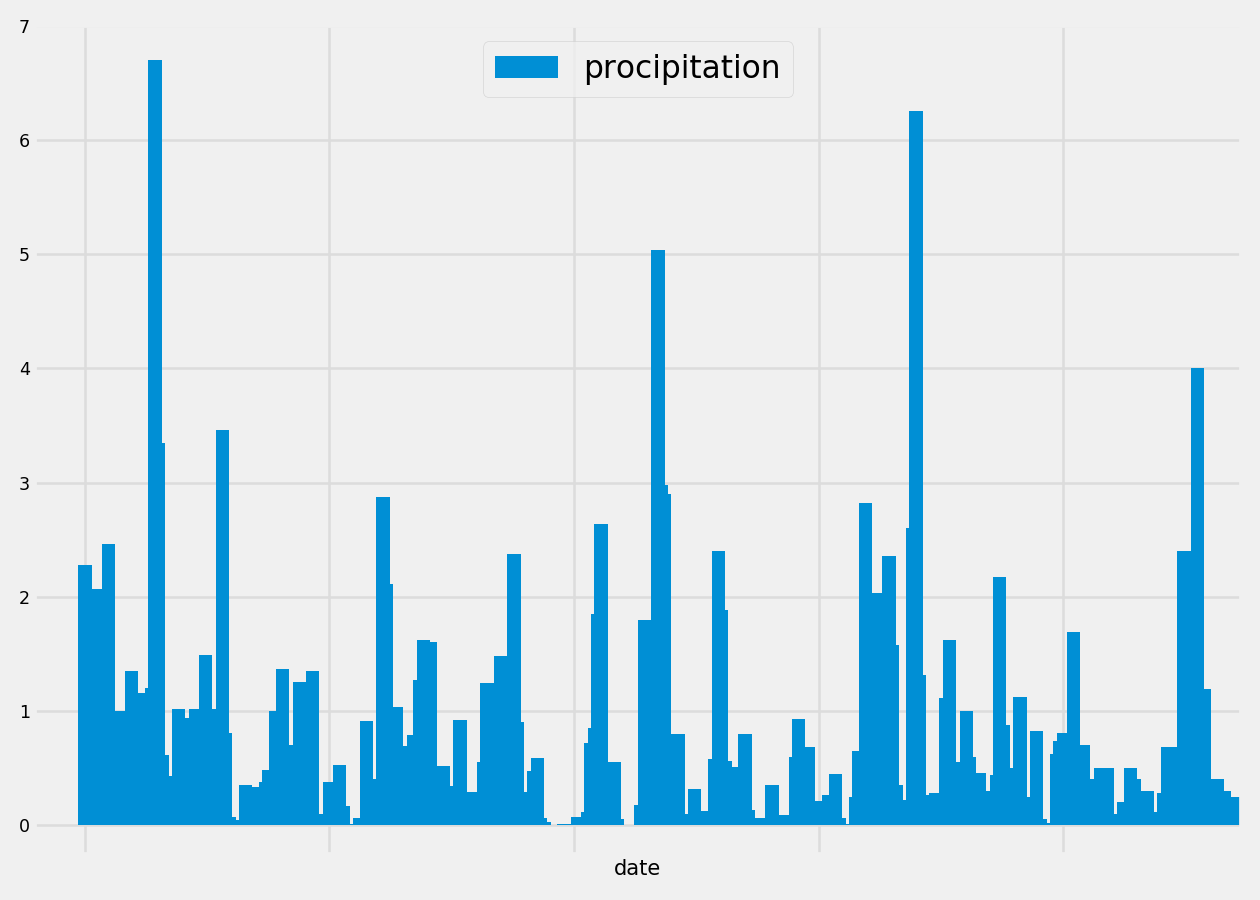

365


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
